In [1]:
library(ggplot2)
library(data.table)
max_ac_df <- readRDS("landing_subset_refined.Rds")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
max_ac_df$altitude <- 500 * round(max_ac_df$altitude/500)

In [3]:
# max_ac_df$altitude <- as.factor(max_ac_df$altitude)

In [4]:
dir.create("animate_landing", showWarnings = F)
setwd("animate_landing")
for(i in 0:4) {
    dir.create(as.character(i), showWarnings = F)
}

In [5]:
get_quadrant <- function(azimuth) {
    if(azimuth < 0 | azimuth > 2*pi) {
        stop("Wrong azimuth")
    }
    else if(azimuth >=0 & azimuth < pi/2) {
        return(1)
    } else if(azimuth >= pi/2 & azimuth < pi) {
        return(2)
    } else if(azimuth >= pi & azimuth < 3*pi/2) {
        return(3)
    } else {
        return(4)
    }
}

get_ac_quadrant <- function(azimuths, ts) {
    quadrants <- sapply(azimuths, get_quadrant)
    durations <- c(0, diff(ts, lag = 1))
    df <- data.frame(quad = quadrants, dur = durations)
    df$dur <- as.numeric(df$dur)
    setDT(df)
    reqd_df <- df[, "total_time" := sum(dur, na.rm = T), by = quad]
    max_records_quad <- table(quadrants)
    max_records_quad <- names(max_records_quad)[which.max(max_records_quad)]
    max_time_quad <- reqd_df$quad[which.max(reqd_df$total_time)]
    if(max_time_quad == as.numeric(max_records_quad)) {
        return(max_time_quad)
    } else {
        return(0)
    }
}

visualize_ac_df <- function(max_ac_df, type = "path") {
    for(id1 in unique(max_ac_df$id)) {
        ac_df <- max_ac_df[max_ac_df$id == id1, ]
        quadrant <- get_ac_quadrant(max_ac_df$azimuth, max_ac_df$ts)
        setwd(as.character(quadrant))
        setorder(ac_df, ts)
        if(type == "path") {
            p <- ggplot(data = ac_df, aes(x = lon, y = lat, frame = ts)) +
                geom_path(aes(color = altitude), arrow = arrow(angle = 18, length = unit(0.065, "inches"), type = 'closed')) +
                xlim(c(min(ac_df$lon), max(ac_df$lon))) +
                scale_colour_gradient2(low = 'black', mid = 'dodgerblue', high = 'orange') +
                ylim(c(min(ac_df$lat), max(ac_df$lat)))
        } else {
            p <- ggplot(data = ac_df, aes(x = lon, y = lat, frame = ts)) +
                geom_point(aes(color = altitude), arrow = arrow(angle = 18, length = unit(0.065, "inches"), type = 'closed')) +
                xlim(c(min(ac_df$lon), max(ac_df$lon))) +
                scale_colour_gradient2(low = 'black', mid = 'dodgerblue', high = 'orange') +
                ylim(c(min(ac_df$lat), max(ac_df$lat)))
        }
        png(width = 880, height = 400, filename = paste0(id1, "_", type, ".png"))
        print(p)
        dev.off()
        setwd("../")
    }
}

visualize_ac_df_points <- function(max_ac_df) {
    visualize_ac_df(max_ac_df, "point")
}

visualize_ac_df_paths <- function(max_ac_df) {
    visualize_ac_df(max_ac_df)
}

library(parallel)
cores <- detectCores() - 1
cl <- makeCluster(cores)
uniq_ac <- unique(max_ac_df$id)
num <- ceiling(length(uniq_ac)/cores)
ac_splits <- factor(ceiling(1:length(uniq_ac)/num))
ac_splits <- split(uniq_ac, ac_splits)
splits <- split(max_ac_df, max_ac_df$id)
splits1 <- lapply(ac_splits, function(ac_split)
    do.call(rbind, splits[ac_split]))
clusterExport(cl, list("visualize_ac_df", "geom_point", "max", "unique", "setorder", "paste0", "ggplot", "aes", "geom_path", "arrow", "unit", "xlim", "ylim", "print", "scale_colour_gradient2", "png", "dev.off", "setwd", "get_ac_quadrant", "sapply", "get_quadrant", "data.frame", "as.numeric", "diff", "pi", "table", "names", "which.max", "sum", "setDT"))
parLapply(cl = cl, X = splits1, fun = visualize_ac_df_paths)
parLapply(cl = cl, X = splits1, fun = visualize_ac_df_points)
stopCluster(cl)

$`1`
NULL

$`2`
NULL

$`3`
NULL

$`4`
NULL

$`5`
NULL

$`6`
NULL

$`7`
NULL

$`8`
NULL

$`9`
NULL

$`10`
NULL

$`11`
NULL

$`1`
NULL

$`2`
NULL

$`3`
NULL

$`4`
NULL

$`5`
NULL

$`6`
NULL

$`7`
NULL

$`8`
NULL

$`9`
NULL

$`10`
NULL

$`11`
NULL

In [6]:
max_ac_df[max_ac_df$id == "4007EF_0", ]

id,lat,lon,ts,altitude,azimuth,ground_speed,d_altitude,last_ts,last_lat,⋯,num_id,max_num_id,id_old,landing_ac,alt,max_alt,ground_speed_est,max_ground_speed_est,max_ratio,last_alt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4007EF_0,40.63321,-73.78306,1466390037,500,2.420772,89.66759,0,1466390030,40.63582,⋯,0,0,4007EF,TRUE,500,37500,161.6833,1374.546,8.236454,NA
4007EF_0,40.63228,-73.78162,1466390039,500,2.420772,89.66759,0,1466390037,40.63321,⋯,0,0,4007EF,TRUE,500,37500,126.4374,1374.546,8.236454,500
4007EF_0,40.63172,-73.78081,1466390041,500,2.420772,89.66759,0,1466390039,40.63228,⋯,0,0,4007EF,TRUE,500,37500,114.0133,1374.546,8.236454,500
4007EF_0,40.62977,-73.77819,1466390044,1000,2.420772,89.66759,0,1466390041,40.63172,⋯,0,0,4007EF,TRUE,500,37500,199.1517,1374.546,8.236454,500
4007EF_0,40.60707,-73.75134,1466390085,1500,2.419026,128.30233,0,1466390044,40.62977,⋯,0,0,4007EF,TRUE,500,37500,161.0465,1374.546,8.236454,1000
4007EF_0,40.60043,-73.74384,1466390093,1500,2.419026,128.30233,0,1466390085,40.60707,⋯,0,0,4007EF,TRUE,500,37500,234.3504,1374.546,8.236454,1500
4007EF_0,40.59364,-73.73605,1466390102,1500,2.419026,128.30233,0,1466390093,40.60043,⋯,0,0,4007EF,TRUE,500,37500,225.4244,1374.546,8.236454,1500
4007EF_0,40.59288,-73.73511,1466390104,1500,2.419026,128.30233,0,1466390102,40.59364,⋯,0,0,4007EF,TRUE,500,37500,109.1469,1374.546,8.236454,1500
4007EF_0,40.58972,-73.73151,1466390108,1500,2.419026,128.30233,0,1466390104,40.59288,⋯,0,0,4007EF,TRUE,500,37500,228.6119,1374.546,8.236454,1500


lon,lat,last_lon,last_lat
<dbl>,<dbl>,<dbl>,<dbl>
-72.70526,40.63788,-72.71395,40.63568
-71.69891,40.88850,-71.70709,40.88649
-71.62886,40.90550,-71.63535,40.90391
-72.72504,40.96271,-72.71682,40.96639


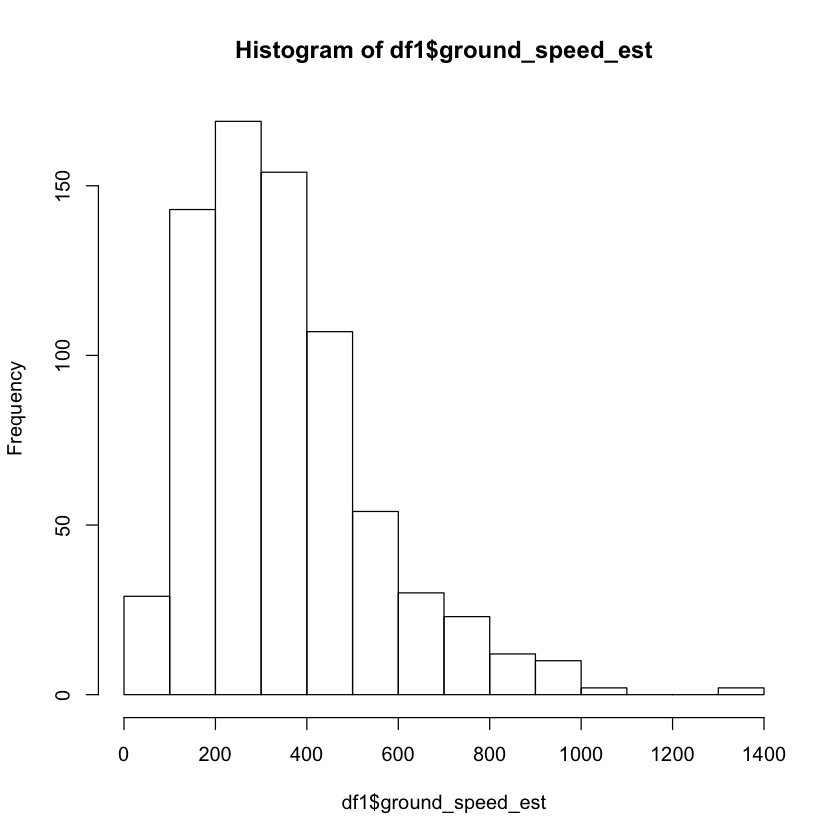

In [7]:
df1 <- max_ac_df[max_ac_df$id == "4007EF_0", ]
hist(df1$ground_speed_est)
setorder(df1, id, ts)
df1[, c("last_lon", "last_lat") := list(c(NA, lon[-.N]), c(NA, lat[-.N])), by = id]
df1[df1$ground_speed_est > 1000, c("lon", "lat", "last_lon", "last_lat")]

In [8]:
print(length(uniq_ac))

[1] 215


In [9]:
# func <- function(ac_df, uniq_ts) {
#   for(i_time in uniq_ts) {
#     subset_df <- ac_df[ts <= i_time & i_time <= max_ts, ]
#     p <- ggplot(data = subset_df, aes(x = lon, y = lat, frame = ts)) +
#     geom_path(aes(color = altitude), arrow = arrow(angle = 18, length = unit(0.065, "inches"), type = 'closed')) +
#     xlim(c(min(ac_df$lon), max(ac_df$lon))) +
#     scale_colour_gradient2(low = 'black', mid = 'dodgerblue', high = 'orange') +
#     ylim(c(min(ac_df$lat), max(ac_df$lat)))# +
# #     theme(legend.position = "none")
#     print(p)
#   }
# }

# animate_ac_df <- function(max_ac_df) {
#     for(id1 in unique(max_ac_df$id)) {
#         dir.create(id1)
#         setwd(id1)
#         ac_df <- max_ac_df[max_ac_df$id == id1, ]
#         ac_df$max_ts <- max(ac_df$ts, na.rm = T)
#         uniq_ts <- unique(ac_df$ts)
#         uniq_ts <- uniq_ts[order(uniq_ts)]
#         setorder(ac_df, ts)
#         oopt <- ani.options(interval = 0.05, nmax = nrow(ac_df))
#         saveHTML(func(ac_df, uniq_ts), interval = 0.05, width = 880,
#                  height = 400, htmlfile = paste0(id1, ".html"))
#         setwd("../")
#     }
# }

In [10]:
# clusterExport(cl, list("animate_ac_df", "dir.create", "setwd", "max", "unique", "setorder", "ani.options", "saveHTML", "func", "paste0", "ggplot", "aes", "geom_path", "arrow", "unit", "xlim", "ylim", "print", "scale_colour_gradient2"))

In [11]:
# parLapply(cl = cl, X = splits1, fun = animate_ac_df)

In [12]:
# stopCluster(cl)